In [1]:
# Imports
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
Y = iris.target.reshape(-1, 1)  # Labels: 0, 1, 2 (Setosa, Versicolor, Virginica)
labels = iris.target_names

In [3]:
# One-hot encode the labels
ohe = OneHotEncoder()
y = ohe.fit_transform(Y).toarray()

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

In [6]:
# Initialize weights and biases
np.random.seed(101)
weights_input_hidden = np.random.rand(4, 5)  # 4 inputs, 5 hidden neurons
weights_hidden_output = np.random.rand(5, 3)  # 5 hidden neurons, 3 outputs
bias_hidden = np.random.rand(1, 5)
bias_output = np.random.rand(1, 3)

# Learning rate
learning_rate = 0.1

In [7]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [8]:
# Accuracy before training
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

# Convert predictions to class labels
predicted_labels = np.argmax(predicted_output, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Test Accuracy (Before training): {accuracy * 100:.2f}%")

Test Accuracy (Before training): 36.67%


In [9]:
# Forward Pass Visualization with Actual Values
def visualize_forward_pass(X_sample, weights_ih, weights_ho, bias_h, bias_o, sample_idx=0):
    """Visualize forward pass calculations for a single sample"""
    
    # Take first sample for visualization
    sample = X_sample[sample_idx:sample_idx+1]  # Keep batch dimension
    
    print(f"\n=== Forward Pass Visualization for Sample {sample_idx+1} ===")
    print(f"Input features: {sample.flatten()}")
    print(f"Feature names: ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']")
    
    # Forward pass calculations
    print("\n--- HIDDEN LAYER CALCULATIONS ---")
    hidden_input = np.dot(sample, weights_ih) + bias_h
    print(f"Hidden layer input (z1) = X * W1 + b1")
    print(f"Shape: {sample.shape} * {weights_ih.shape} + {bias_h.shape} = {hidden_input.shape}")
    print(f"Hidden layer input values: {hidden_input.flatten()}")
    
    hidden_output = sigmoid(hidden_input)
    print(f"\nHidden layer output (a1) = sigmoid(z1)")
    print(f"Hidden layer activations: {hidden_output.flatten()}")
    
    print("\n--- OUTPUT LAYER CALCULATIONS ---")
    output_input = np.dot(hidden_output, weights_ho) + bias_o
    print(f"Output layer input (z2) = a1 * W2 + b2")
    print(f"Shape: {hidden_output.shape} * {weights_ho.shape} + {bias_o.shape} = {output_input.shape}")
    print(f"Output layer input values: {output_input.flatten()}")
    
    output = sigmoid(output_input)
    print(f"\nFinal output (a2) = sigmoid(z2)")
    print(f"Final predictions: {output.flatten()}")
    
    predicted_class = np.argmax(output)
    class_names = ['Setosa', 'Versicolor', 'Virginica']
    print(f"\nPredicted class: {predicted_class} ({class_names[predicted_class]})")
    print(f"Confidence scores: {dict(zip(class_names, output.flatten()))}")
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Input features
    feature_names = ['Sepal L.', 'Sepal W.', 'Petal L.', 'Petal W.']
    ax1.bar(feature_names, sample.flatten(), color='lightblue', alpha=0.7)
    ax1.set_title('Input Features (Normalized)', fontweight='bold')
    ax1.set_ylabel('Feature Value')
    ax1.grid(True, alpha=0.3)
    for i, v in enumerate(sample.flatten()):
        ax1.text(i, v + 0.05, f'{v:.3f}', ha='center', va='bottom')
    
    # Hidden layer activations
    hidden_neurons = [f'H{i+1}' for i in range(5)]
    ax2.bar(hidden_neurons, hidden_output.flatten(), color='lightgreen', alpha=0.7)
    ax2.set_title('Hidden Layer Activations', fontweight='bold')
    ax2.set_ylabel('Activation Value')
    ax2.grid(True, alpha=0.3)
    for i, v in enumerate(hidden_output.flatten()):
        ax2.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Output layer predictions
    ax3.bar(class_names, output.flatten(), color='lightcoral', alpha=0.7)
    ax3.set_title('Output Layer Predictions', fontweight='bold')
    ax3.set_ylabel('Probability')
    ax3.grid(True, alpha=0.3)
    for i, v in enumerate(output.flatten()):
        ax3.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
    
    # Network flow diagram
    ax4.text(0.1, 0.9, 'Network Flow:', fontsize=14, fontweight='bold', transform=ax4.transAxes)
    ax4.text(0.1, 0.8, f'Input → Hidden: X * W₁ + b₁', fontsize=12, transform=ax4.transAxes)
    ax4.text(0.1, 0.7, f'Hidden Activation: σ(z₁)', fontsize=12, transform=ax4.transAxes)
    ax4.text(0.1, 0.6, f'Hidden → Output: a₁ * W₂ + b₂', fontsize=12, transform=ax4.transAxes)
    ax4.text(0.1, 0.5, f'Final Output: σ(z₂)', fontsize=12, transform=ax4.transAxes)
    ax4.text(0.1, 0.3, f'Weight matrices:', fontsize=12, fontweight='bold', transform=ax4.transAxes)
    ax4.text(0.1, 0.2, f'W₁: {weights_ih.shape} (Input→Hidden)', fontsize=10, transform=ax4.transAxes)
    ax4.text(0.1, 0.1, f'W₂: {weights_ho.shape} (Hidden→Output)', fontsize=10, transform=ax4.transAxes)
    ax4.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return output

# Visualize forward pass for the first test sample
print("Neural Network Forward Pass Calculation:")
result = visualize_forward_pass(X_test, weights_input_hidden, weights_hidden_output, 
                               bias_hidden, bias_output, sample_idx=0)

Neural Network Forward Pass Calculation:

=== Forward Pass Visualization for Sample 1 ===
Input features: [ 0.31099753 -0.59237301  0.53540856  0.00087755]
Feature names: ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

--- HIDDEN LAYER CALCULATIONS ---
Hidden layer input (z1) = X * W1 + b1
Shape: (1, 4) * (4, 5) + (1, 5) = (1, 5)
Hidden layer input values: [0.30719438 1.04934532 0.40769725 0.58533879 1.54024451]

Hidden layer output (a1) = sigmoid(z1)
Hidden layer activations: [0.57620029 0.74064916 0.60053559 0.64229493 0.82350027]

--- OUTPUT LAYER CALCULATIONS ---
Output layer input (z2) = a1 * W2 + b2
Shape: (1, 5) * (5, 3) + (1, 3) = (1, 3)
Output layer input values: [1.58677915 1.76799211 3.21078707]

Final output (a2) = sigmoid(z2)
Final predictions: [0.83016247 0.85420779 0.9612382 ]

Predicted class: 2 (Virginica)
Confidence scores: {'Setosa': 0.8301624690706956, 'Versicolor': 0.8542077931019632, 'Virginica': 0.961238201839235}


NameError: name 'plt' is not defined

In [ ]:
# Initialize a list to store loss values
loss_values = []

# Training loop
for epoch in range(10000):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Compute loss (Mean Squared Error)
    loss = np.mean((y_train - predicted_output) ** 2)

    # Backward pass
    error_output_layer = y_train - predicted_output
    delta_output_layer = error_output_layer * sigmoid_derivative(predicted_output)

    error_hidden_layer = delta_output_layer.dot(weights_hidden_output.T)
    delta_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(delta_output_layer) * learning_rate
    weights_input_hidden += X_train.T.dot(delta_hidden_layer) * learning_rate
    bias_output += np.sum(delta_output_layer, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(delta_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Store the loss value for visualization
    if epoch % 100 == 0:  # Store loss every 100 epochs
      loss_values.append(loss)
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.5101023819377971
Epoch 1000, Loss: 0.010054486794959822
Epoch 2000, Loss: 0.009739696706334428
Epoch 3000, Loss: 0.008963447699687637
Epoch 4000, Loss: 0.007183897130438578
Epoch 5000, Loss: 0.006425780816848915
Epoch 6000, Loss: 0.006098731443873158
Epoch 7000, Loss: 0.005928460866475487
Epoch 8000, Loss: 0.005828042550146188
Epoch 9000, Loss: 0.005761935280698391


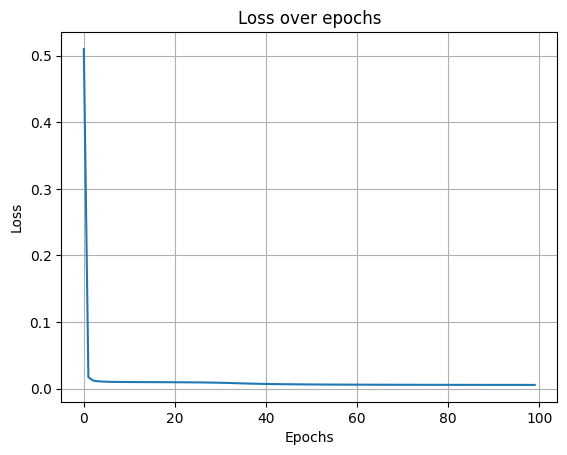

In [ ]:
# Visualization of loss values
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
# Evaluate on the test set
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

# Convert predictions to class labels
predicted_labels = np.argmax(predicted_output, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 100.00%


In [ ]:
incorrect_prediction_indexes = np.where(predicted_labels != true_labels)[0]
incorrect_predictions = [[predicted_labels[i] for i in incorrect_prediction_indexes], [true_labels[i] for i in incorrect_prediction_indexes]]
print("Number of Incorrect Predictions:", len(incorrect_prediction_indexes))
print("Incorrect Predictions:", incorrect_predictions)

Number of Incorrect Predictions: 0
Incorrect Predictions: [[], []]


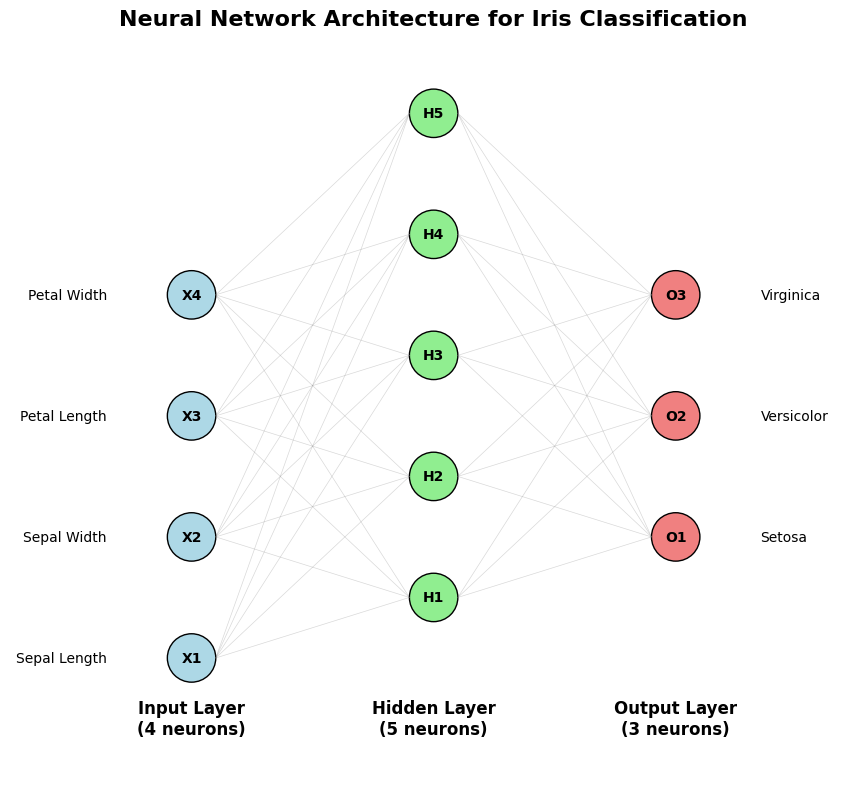

In [10]:
# Network Architecture Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def visualize_network_architecture():
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Define positions for layers
    input_positions = [(1, i) for i in range(4)]
    hidden_positions = [(3, i + 0.5) for i in range(5)]
    output_positions = [(5, i + 1) for i in range(3)]
    
    # Draw neurons
    for i, pos in enumerate(input_positions):
        circle = patches.Circle(pos, 0.2, facecolor='lightblue', edgecolor='black')
        ax.add_patch(circle)
        ax.text(pos[0], pos[1], f'X{i+1}', ha='center', va='center', fontweight='bold')
    
    for i, pos in enumerate(hidden_positions):
        circle = patches.Circle(pos, 0.2, facecolor='lightgreen', edgecolor='black')
        ax.add_patch(circle)
        ax.text(pos[0], pos[1], f'H{i+1}', ha='center', va='center', fontweight='bold')
    
    for i, pos in enumerate(output_positions):
        circle = patches.Circle(pos, 0.2, facecolor='lightcoral', edgecolor='black')
        ax.add_patch(circle)
        ax.text(pos[0], pos[1], f'O{i+1}', ha='center', va='center', fontweight='bold')
    
    # Draw connections
    for input_pos in input_positions:
        for hidden_pos in hidden_positions:
            ax.plot([input_pos[0] + 0.2, hidden_pos[0] - 0.2], 
                   [input_pos[1], hidden_pos[1]], 'gray', alpha=0.3, linewidth=0.5)
    
    for hidden_pos in hidden_positions:
        for output_pos in output_positions:
            ax.plot([hidden_pos[0] + 0.2, output_pos[0] - 0.2], 
                   [hidden_pos[1], output_pos[1]], 'gray', alpha=0.3, linewidth=0.5)
    
    # Add layer labels
    ax.text(1, -0.5, 'Input Layer\n(4 neurons)', ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(3, -0.5, 'Hidden Layer\n(5 neurons)', ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(5, -0.5, 'Output Layer\n(3 neurons)', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Add feature labels
    feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
    for i, name in enumerate(feature_names):
        ax.text(0.3, i, name, ha='right', va='center', fontsize=10)
    
    # Add class labels
    class_names = ['Setosa', 'Versicolor', 'Virginica']
    for i, name in enumerate(class_names):
        ax.text(5.7, i + 1, name, ha='left', va='center', fontsize=10)
    
    ax.set_xlim(-0.5, 6.5)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Neural Network Architecture for Iris Classification', fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

# Visualize the network
visualize_network_architecture()